In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d iamhungundji/dysarthria-detection
!unzip *.zip

 94% 146M/155M [00:01<00:00, 124MB/s]
100% 155M/155M [00:01<00:00, 136MB/s]
Archive:  dysarthria-detection.zip
  inflating: torgo_data/data.csv     
  inflating: torgo_data/dysarthria_female/F01_Session1_0001.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0002.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0004.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0006.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0007.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0008.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0013.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0015.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0017.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0018.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0021.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0022.wav  
  inflating: torgo_data/dysarthria_female/F01_Session1_0024

**Reading the Data**


In [3]:
df = pd.read_csv('/content/torgo_data/data.csv')

In [4]:
df.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [5]:
df.tail()

,is_dysarthria,gender,filename
1995,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0144.wav
1996,dysarthria,male,torgo_data/dysarthria_male/M02_Session1_0005.wav
1997,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0040.wav
1998,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0260.wav
1999,dysarthria,male,torgo_data/dysarthria_male/M03_Session2_0145.wav


**Visualize the waveplot, MFCC, and Mel Spectrogram for any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and non-dysarthric female**

In [7]:
def get_waveplot(path, target, gender):
  x, sr = librosa.load(path)
  plt.figure(figsize=(18,8))
  librosa.display.waveplot(x, sr=sr)
  plt.title('Waveplot of '+target+' '+gender)
  plt.show()

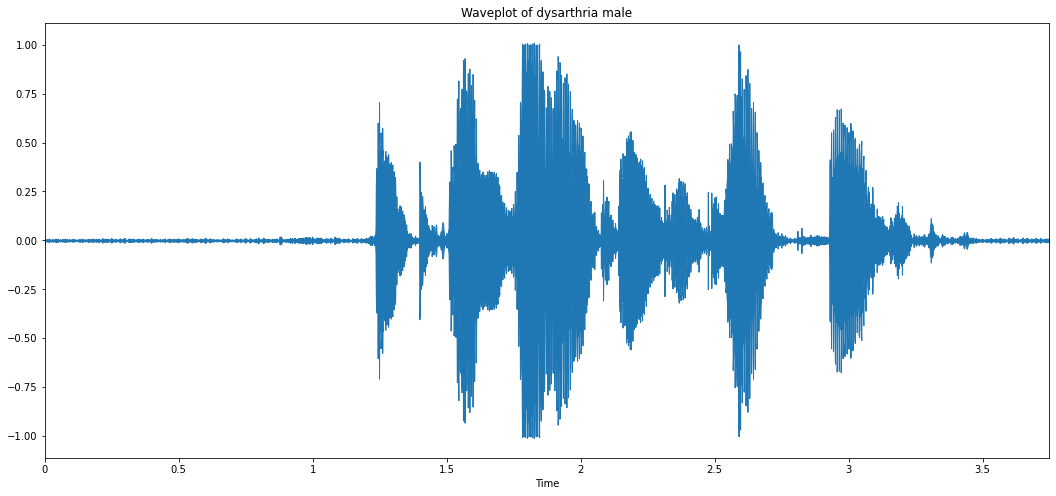

In [8]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_waveplot(sample['filename'].values[1], sample['is_dysarthria'].values[1], 
             sample['gender'].values[1])
ipd.Audio(sample['filename'].values[1])

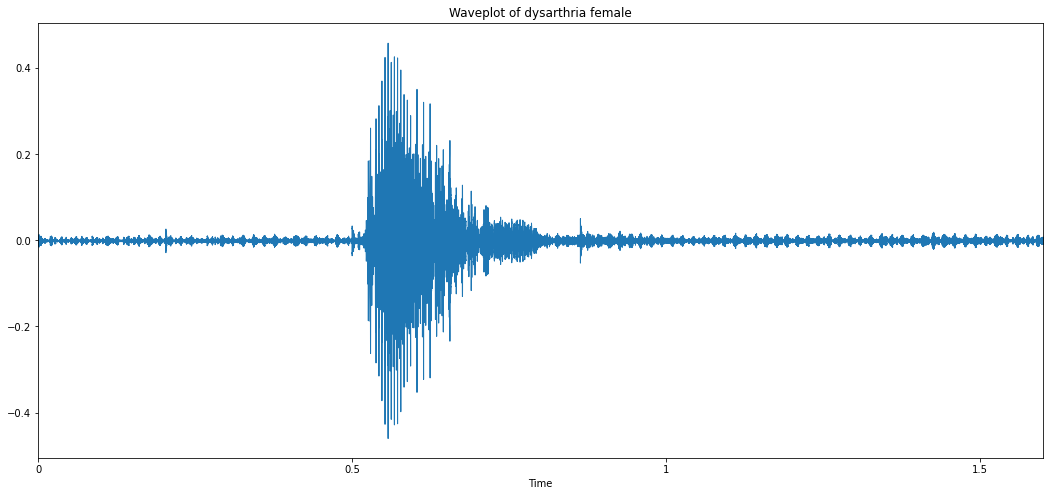

In [10]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_waveplot(sample['filename'].values[1], sample['is_dysarthria'].values[1], 
             sample['gender'].values[1])
ipd.Audio(sample['filename'].values[1])

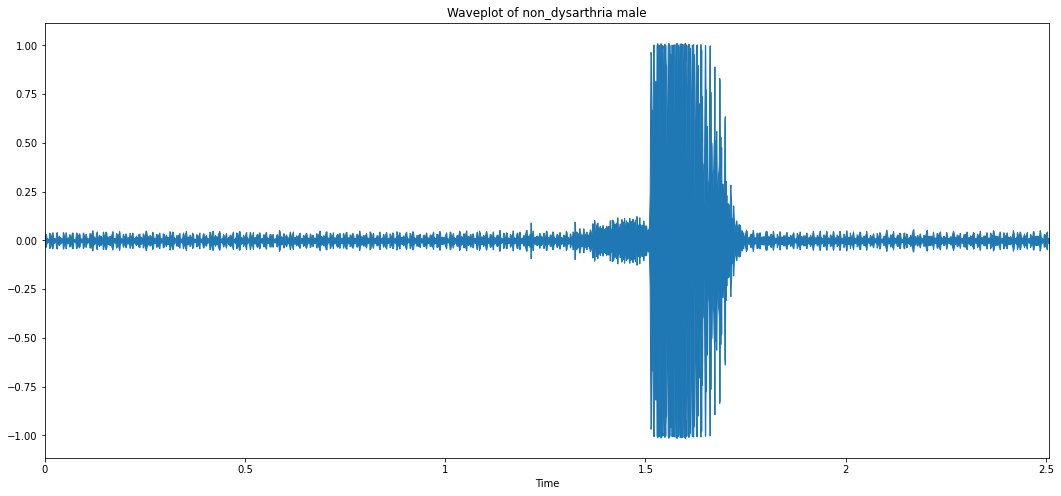

In [11]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_waveplot(sample['filename'].values[1], sample['is_dysarthria'].values[1], 
             sample['gender'].values[1])
ipd.Audio(sample['filename'].values[1])

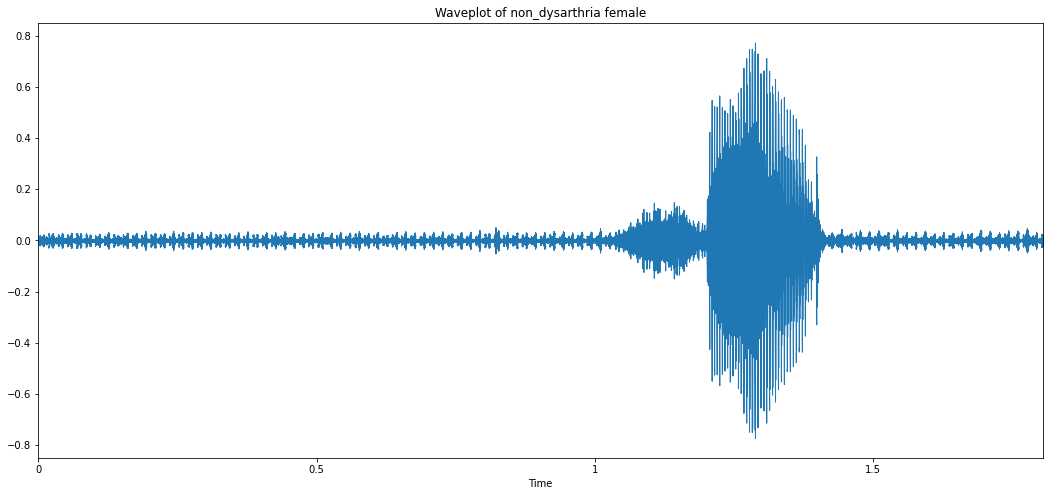

In [13]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_waveplot(sample['filename'].values[1], sample['is_dysarthria'].values[1], 
             sample['gender'].values[1])
ipd.Audio(sample['filename'].values[1])

In [14]:
def get_mfcc(path, target, gender):
  x, sr = librosa.load(path)
  mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=20)
  print(mfccs.shape)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')
  plt.title('MFCC Spectral of '+target+' '+gender)
  plt.show()

(20, 72)


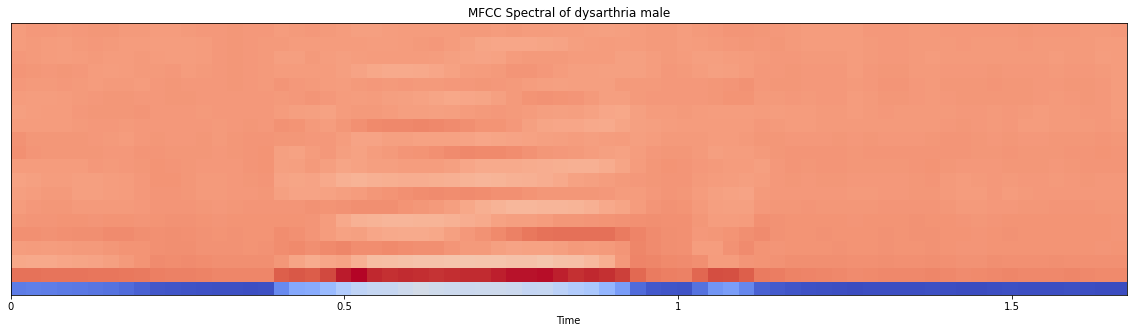

In [15]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 406)


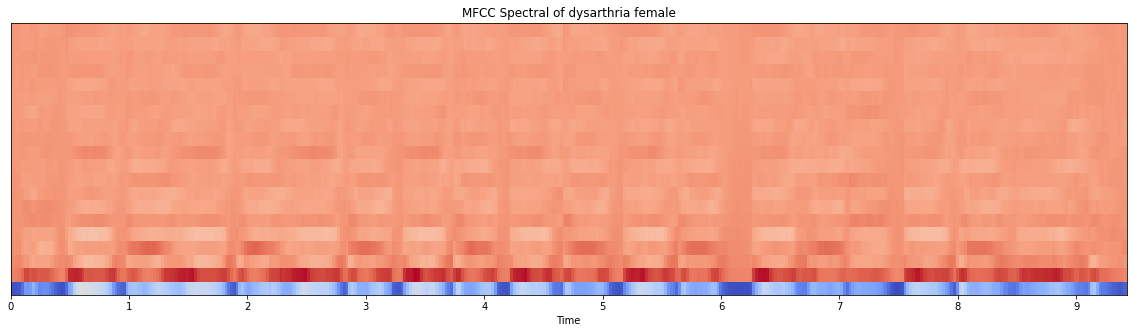

In [16]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 246)


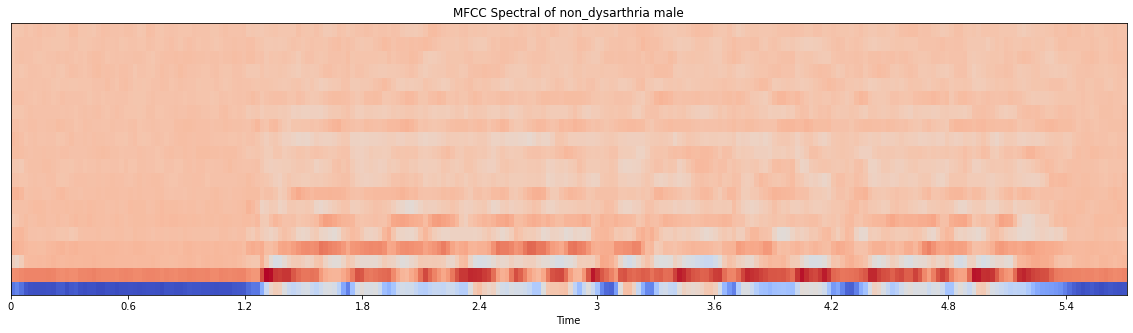

In [17]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(20, 182)


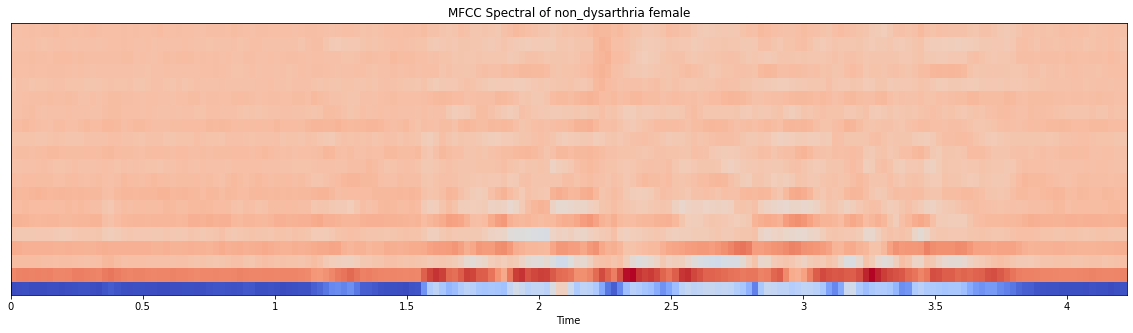

In [18]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_mfcc(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

In [19]:
def get_melspec(path, target, gender):
  x, sr = librosa.load(path)
  melspec = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128)
  print(melspec.shape)
  plt.figure(figsize=(20,5))
  librosa.display.specshow(melspec, sr=sr, x_axis='time')
  plt.title('Mel Spectrogram of '+target+' '+gender)
  plt.show()

(128, 72)


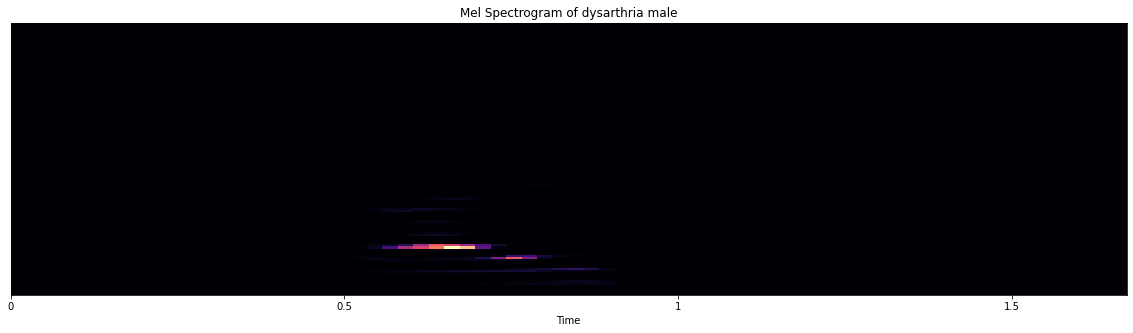

In [20]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 406)


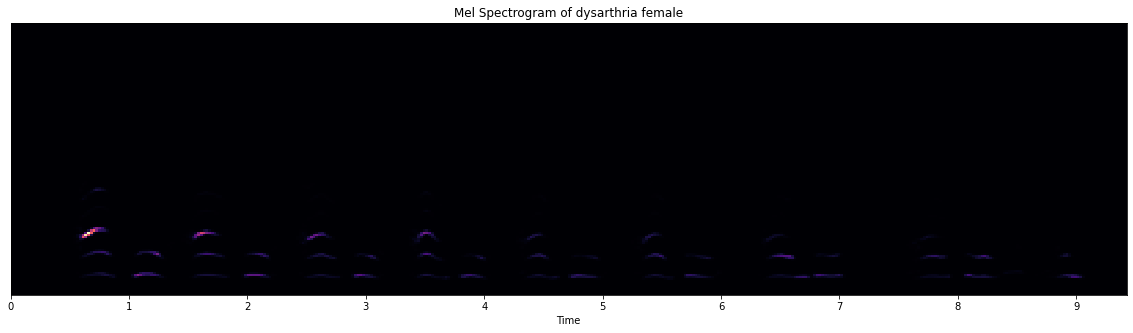

In [21]:
sample = df[(df['is_dysarthria']=='dysarthria') & (df['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 246)


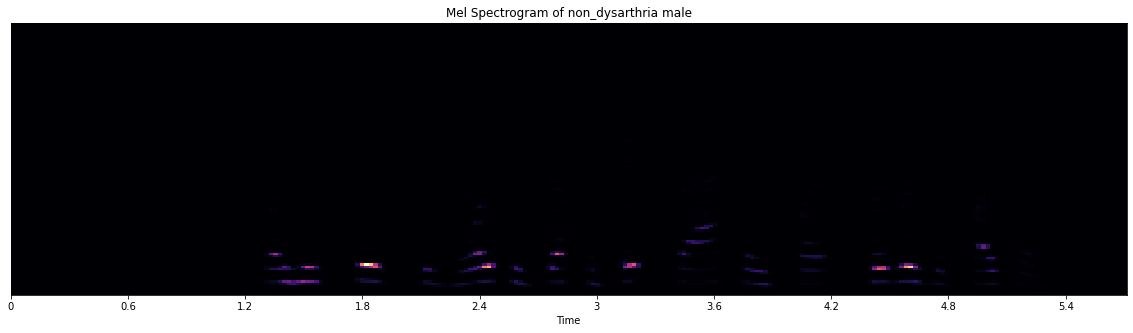

In [22]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='male')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

(128, 182)


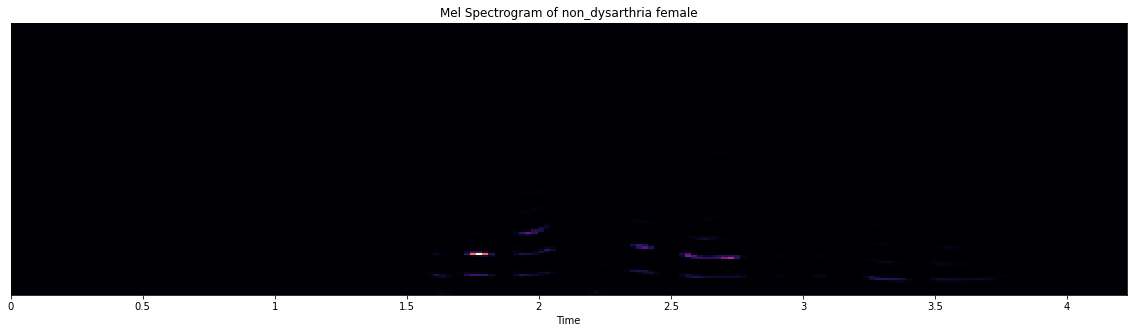

In [23]:
sample = df[(df['is_dysarthria']=='non_dysarthria') & (df['gender']=='female')]
get_melspec(sample['filename'].values[0], sample['is_dysarthria'].values[0], 
             sample['gender'].values[0])
ipd.Audio(sample['filename'].values[0])

**Defining a function to create 256 MFCC features for any given audio file**

In [24]:
def create_mfcc_features(path):
  mfccs=[]
  try:
    x, sr = librosa.load(path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=256)
    mfccs = np.mean(mfccs.T, axis=0)
  except:
    print('Error found in audio')
  return mfccs

**Applying the function on all audio files listed in data.csv**

In [25]:
%%time

x_df = pd.DataFrame(df['filename'].apply(lambda x:create_mfcc_features(x)).tolist())

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Error found in audio


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=209
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=583
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=581
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=185
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=946
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=214
  n_fft, y.shape[-1]


CPU times: user 1min 44s, sys: 1min 20s, total: 3min 5s
Wall time: 1min 39s


In [26]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-224.202225,104.766289,-19.249100,39.976105,-13.658643,19.425083,-3.005526,7.105515,5.549227,-4.107284,...,1.382414,0.946646,0.779773,1.034225,0.417392,0.073569,0.560806,0.604964,0.170649,-0.222621
1,-301.802734,113.472832,-19.863441,40.374279,-16.921591,21.515228,4.499708,15.208834,7.142713,1.031963,...,1.247081,1.180266,1.058408,1.241004,0.026150,-1.417642,0.081231,0.036446,0.018918,-0.752195
2,-305.652679,116.443367,-27.130651,46.842144,-22.617197,24.739267,3.893429,14.112663,8.798301,0.695419,...,0.969411,0.873021,0.453568,1.044326,-0.004185,-1.480199,0.273740,0.217892,-0.205967,-0.590402
3,-214.418564,121.380379,-38.858505,39.850506,-27.386419,23.892429,-4.153133,8.637264,4.428192,-0.624779,...,1.117963,0.611449,0.945472,0.702243,0.212583,-0.102357,0.021461,0.346264,-0.056452,-0.267683
4,-283.125305,108.704826,-20.648291,46.923939,-15.770267,26.458565,-0.413044,12.762578,9.015738,-2.466657,...,1.457438,1.600919,0.916394,0.728466,0.549834,-0.164512,0.135451,-0.277304,-0.432144,-0.468542


In [28]:
x_df.shape

(2000, 128)

In [29]:
encoder = LabelEncoder()
encoder.fit(df['is_dysarthria'])
y = encoder.transform(df['is_dysarthria'])

In [30]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [31]:
df_post_process=pd.concat([pd.DataFrame(x_df), pd.DataFrame(y)], axis=1)

In [32]:
df_post_process=df_post_process.dropna()

In [33]:
x_df=df_post_process.iloc[:,:-1]

In [34]:
y=df_post_process.iloc[:,-1:]

**Split the data into training and validation by a ratio of 90:10**

In [35]:
x_train, x_val, y_train, y_val = train_test_split(np.array(x_df), y, test_size=0.1)

In [36]:
x_train.shape, x_val.shape

((1799, 128), (200, 128))

In [37]:
y_train

,0
577,0
345,1
1479,1
1025,1
426,1
...,...
555,0
1215,1
1713,0
1005,1


**Reshaping the MFCC features for CNN**

In [38]:
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

In [39]:
len(df['is_dysarthria'].unique())

2

**Building the CNN model**

In [40]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 8)           0         
                                                                 
 flatten (Flatten)           (None, 64)                0

In [41]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [42]:
x_train.shape, y_train.shape

((1799, 16, 8, 1), (1799, 1))

In [43]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 [==============================] - 2s 7ms/step - loss: 3.5969 - accuracy: 0.4903 - recall: 0.4220
Epoch 2/50
57/57 [==============================] - 0s 7ms/step - loss: 2.4988 - accuracy: 0.4992 - recall: 0.4276
Epoch 3/50
57/57 [==============================] - 0s 7ms/step - loss: 1.9133 - accuracy: 0.5231 - recall: 0.4588
Epoch 4/50
57/57 [==============================] - 0s 7ms/step - loss: 1.5212 - accuracy: 0.5436 - recall: 0.5078
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 1.2580 - accuracy: 0.5275 - recall: 0.4855
Epoch 6/50
57/57 [==============================] - 0s 6ms/step - loss: 1.1112 - accuracy: 0.5231 - recall: 0.4788
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.9117 - accuracy: 0.5536 - recall: 0.5323
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.8459 - accuracy: 0.5158 - recall: 0.4933
Epoch 9/50
57/57 [==============================] - 0s 6ms/step - loss: 0.7348 -

In [44]:
opt2 = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.85)
model.compile(optimizer=opt2, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Recall()])

In [45]:
history = model.fit(x_train,y_train,epochs=50)

Epoch 1/50
57/57 [==============================] - 2s 11ms/step - loss: 0.4985 - accuracy: 0.7688 - recall_1: 0.8252
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 0.4721 - accuracy: 0.7771 - recall_1: 0.8330
Epoch 3/50
57/57 [==============================] - 0s 7ms/step - loss: 0.4545 - accuracy: 0.8032 - recall_1: 0.8530
Epoch 4/50
57/57 [==============================] - 0s 7ms/step - loss: 0.4311 - accuracy: 0.8071 - recall_1: 0.8597
Epoch 5/50
57/57 [==============================] - 0s 7ms/step - loss: 0.4083 - accuracy: 0.8216 - recall_1: 0.8586
Epoch 6/50
57/57 [==============================] - 0s 7ms/step - loss: 0.3679 - accuracy: 0.8388 - recall_1: 0.8697
Epoch 7/50
57/57 [==============================] - 0s 7ms/step - loss: 0.3636 - accuracy: 0.8399 - recall_1: 0.8764
Epoch 8/50
57/57 [==============================] - 0s 7ms/step - loss: 0.3467 - accuracy: 0.8527 - recall_1: 0.8775
Epoch 9/50
57/57 [==============================] - 0s 7ms/step

**Evaluating the model**

In [46]:
model.evaluate(x_val,y_val)

7/7 [==============================] - 1s 6ms/step - loss: 0.0559 - accuracy: 0.9800 - recall_1: 1.0000


[0.055903300642967224, 0.9800000190734863, 1.0]

In [47]:
y_pred = model.predict(x_val)

7/7 [==============================] - 0s 5ms/step


**AUC ROC Score**

In [48]:
from sklearn.metrics import roc_auc_score,recall_score,confusion_matrix
roc_auc_score(y_val, y_pred)

0.9992997198879552

In [49]:
pred_val = np.round(y_pred)

**Recall Score**

In [51]:
print(recall_score(y_val,  pred_val))

1.0


**Confusion Matrix**

In [52]:
pd.DataFrame(confusion_matrix(y_val,pred_val),columns=np.sort(df['is_dysarthria'].unique()),index=np.sort(df['is_dysarthria'].unique()))

,dysarthria,non_dysarthria
dysarthria,94,4
non_dysarthria,0,102
